In [1]:
import pandas as pd
df = pd.read_csv('D:\\LPU Text books\\alex.csv')
df = df.drop(df.index[21600:])
# Assuming df is your DataFrame
# Combine 'date' and 'time' into a single datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)

# Now, 'datetime' can be used as a feature variable, and 'energy' as the target variable

print(df.head(10))
print(df.tail(20))

                     energy   time        date
datetime                                      
2023-10-01 00:00:00  0.0020  00:00  2023-10-01
2023-10-01 00:01:00  0.0070  00:01  2023-10-01
2023-10-01 00:02:00  0.0120  00:02  2023-10-01
2023-10-01 00:03:00  0.0190  00:03  2023-10-01
2023-10-01 00:04:00  0.0240  00:04  2023-10-01
2023-10-01 00:05:00  0.0296  00:05  2023-10-01
2023-10-01 00:06:00  0.0352  00:06  2023-10-01
2023-10-01 00:07:00  0.0408  00:07  2023-10-01
2023-10-01 00:08:00  0.0464  00:08  2023-10-01
2023-10-01 00:09:00  0.0520  00:09  2023-10-01
                         energy   time        date
datetime                                          
2023-10-15 23:40:00  238.025333  23:40  2023-10-15
2023-10-15 23:41:00  238.049833  23:41  2023-10-15
2023-10-15 23:42:00  238.074333  23:42  2023-10-15
2023-10-15 23:43:00  238.098833  23:43  2023-10-15
2023-10-15 23:44:00  238.123333  23:44  2023-10-15
2023-10-15 23:45:00  238.147833  23:45  2023-10-15
2023-10-15 23:46:00  238.172

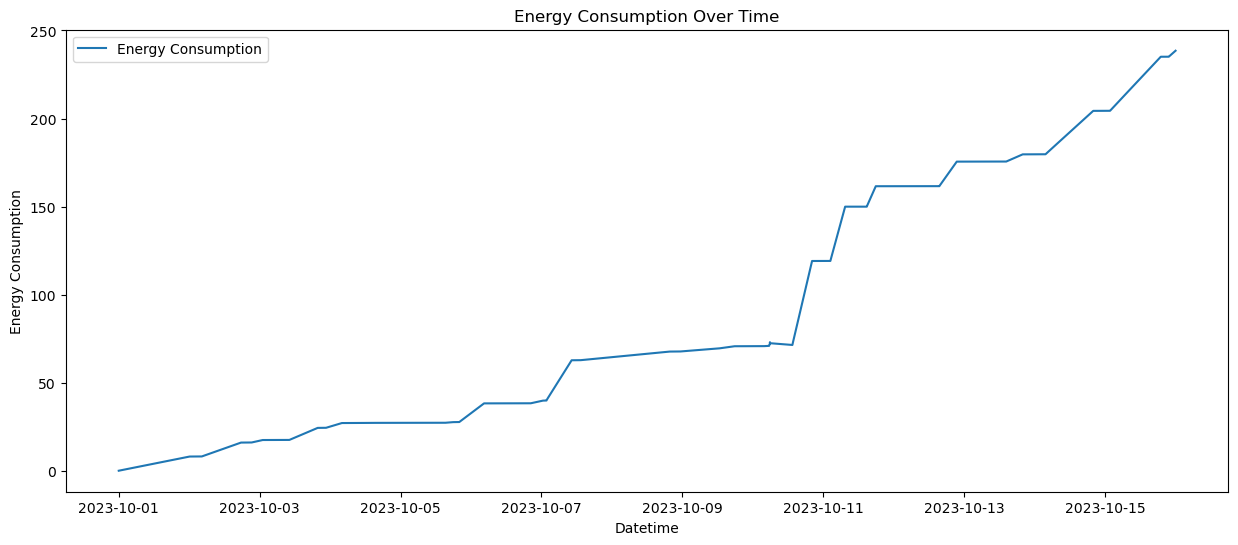

In [2]:
import matplotlib.pyplot as plt

# Plotting the energy consumption over time
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['energy'], label='Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


In [3]:
from statsmodels.tsa.stattools import adfuller


# Perform ADF test
result = adfuller(df['energy'])

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')


ADF Statistic: 0.9177543621068249
p-value: 0.9933177059148082


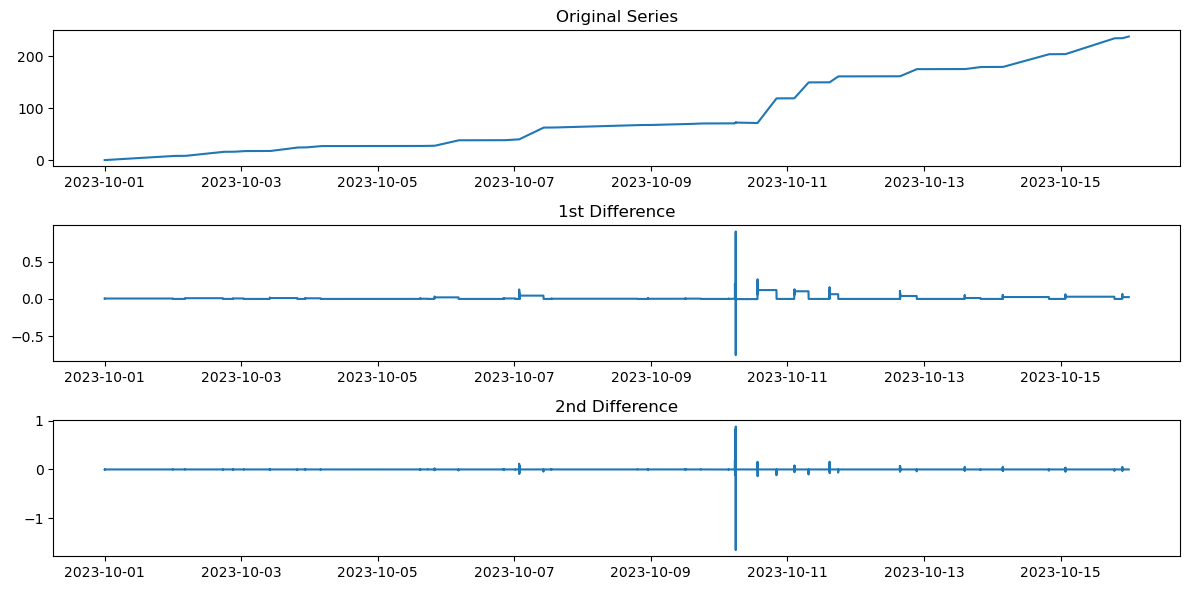

In [7]:
import matplotlib.pyplot as plt

# Differencing once
first_difference = df['energy'].diff().dropna()

# Differencing twice
second_difference = first_difference.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df['energy'], label='Original Series')
plt.title('Original Series')
plt.subplot(3, 1, 2)
plt.plot(first_difference, label='1st Difference')
plt.title('1st Difference')
plt.subplot(3, 1, 3)
plt.plot(second_difference, label='2nd Difference')
plt.title('2nd Difference')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame with datetime as the index
# Difference the 'energy' column
df['energy_diff_1'] = df['energy'].diff()
df['energy_diff_2'] = df['energy_diff_1'].diff()

# Drop the NaN values introduced by differencing
df.dropna(inplace=True)

# Perform ADF test on the differenced data (first order)
result_diff_1 = adfuller(df['energy_diff_1'])
adf_statistic_diff_1 = result_diff_1[0]
p_value_diff_1 = result_diff_1[1]

print("First Order Differencing:")
print(f'ADF Statistic: {adf_statistic_diff_1}')
print(f'p-value: {p_value_diff_1}')

# Perform ADF test on the differenced data (second order)
result_diff_2 = adfuller(df['energy_diff_2'])
adf_statistic_diff_2 = result_diff_2[0]
p_value_diff_2 = result_diff_2[1]

print("\nSecond Order Differencing:")
print(f'ADF Statistic: {adf_statistic_diff_2}')
print(f'p-value: {p_value_diff_2}')


First Order Differencing:
ADF Statistic: -6.005518849824479
p-value: 1.6190487967598555e-07

Second Order Differencing:
ADF Statistic: -29.412180384964813
p-value: 0.0


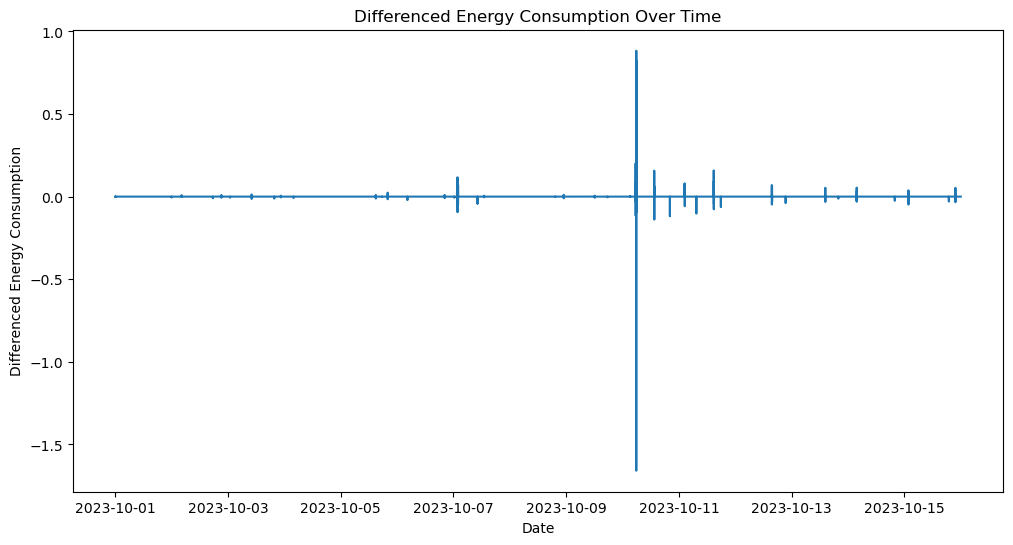

In [9]:
# Visualize the differenced time series data
plt.figure(figsize=(12, 6))
plt.plot(df['energy_diff_2'])
plt.title('Differenced Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Energy Consumption')
plt.show()

C:\Users\ACER\anaconda3\envs\TENSOR\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


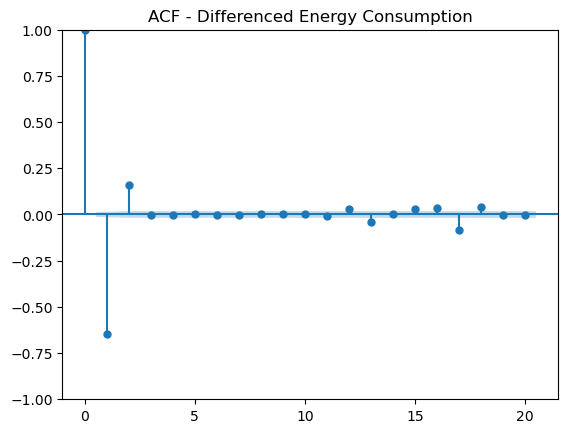

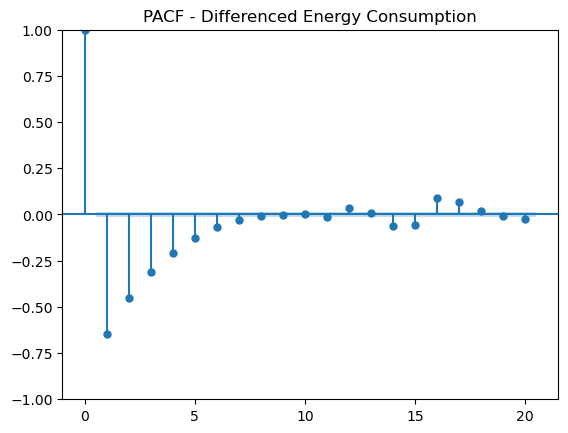

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
# Plot ACF and PACF with more lags
plot_acf(df['energy_diff_2'], lags=20, title='ACF - Differenced Energy Consumption')
plot_pacf(df['energy_diff_2'], lags=20, title='PACF - Differenced Energy Consumption')
plt.show()


In [11]:

print(df.head(20))
print(df.tail(20))


                     energy   time        date  energy_diff_1  energy_diff_2
datetime                                                                    
2023-10-01 00:02:00  0.0120  00:02  2023-10-01         0.0050   0.000000e+00
2023-10-01 00:03:00  0.0190  00:03  2023-10-01         0.0070   2.000000e-03
2023-10-01 00:04:00  0.0240  00:04  2023-10-01         0.0050  -2.000000e-03
2023-10-01 00:05:00  0.0296  00:05  2023-10-01         0.0056   6.000000e-04
2023-10-01 00:06:00  0.0352  00:06  2023-10-01         0.0056   0.000000e+00
2023-10-01 00:07:00  0.0408  00:07  2023-10-01         0.0056   0.000000e+00
2023-10-01 00:08:00  0.0464  00:08  2023-10-01         0.0056  -6.938894e-18
2023-10-01 00:09:00  0.0520  00:09  2023-10-01         0.0056   6.938894e-18
2023-10-01 00:10:00  0.0576  00:10  2023-10-01         0.0056   0.000000e+00
2023-10-01 00:11:00  0.0632  00:11  2023-10-01         0.0056   6.938894e-18
2023-10-01 00:12:00  0.0688  00:12  2023-10-01         0.0056  -1.387779e-17

In [12]:
import pandas as pd

# Assuming df is your DataFrame with datetime as the index
# Set the percentage of data to use for training (e.g., 80%)
train_percentage = 0.8

# Calculate the split index
split_index = int(len(df) * train_percentage)

# Split the data
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Print the shapes of the training and testing sets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (17278, 5)
Testing data shape: (4320, 5)


C:\Users\ACER\anaconda3\envs\TENSOR\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\envs\TENSOR\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\envs\TENSOR\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\envs\TENSOR\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ACER\anaconda3\envs\TENSOR\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Ma

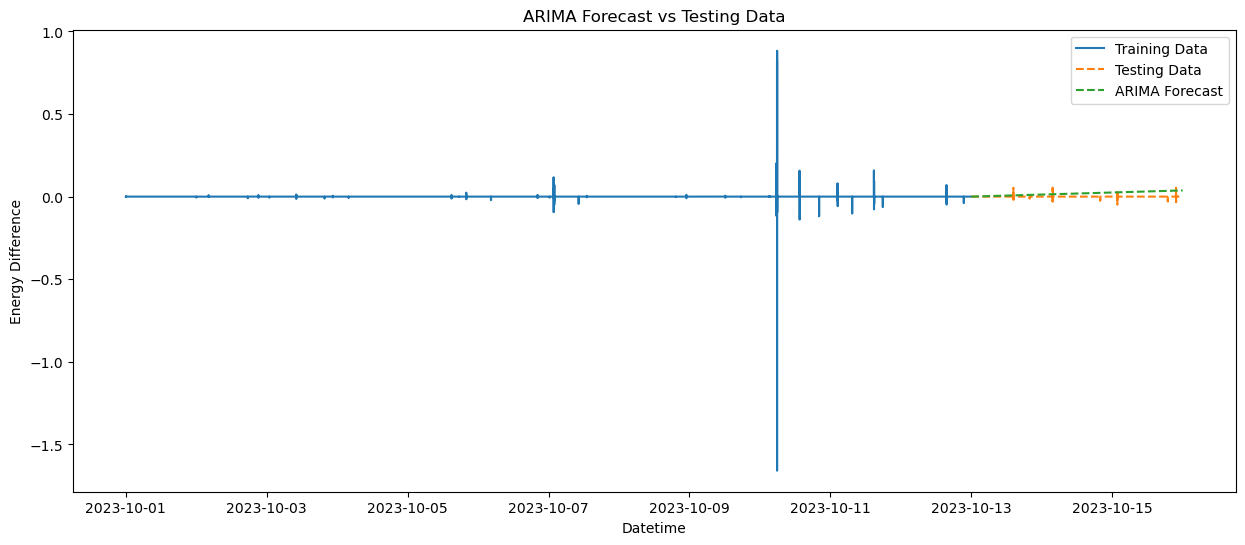

Root Mean Squared Error: 0.021712962100761256


In [106]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming train_data is your training set with 'datetime' as the index
# and 'energy_diff' as the column you want to predict

# Define ARIMA model and fit to the training data
model = ARIMA(train_data['energy_diff_2'], order=(1,2,15))  # Adjust order=(p, d, q) based on your data
fit_model = model.fit()

# Forecast the next n steps (adjust 'steps' based on your needs)
steps = len(test_data)
forecast = fit_model.get_forecast(steps=steps)

# Plot the training data, testing data, and the forecast
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['energy_diff_2'], label='Training Data')
plt.plot(test_data.index, test_data['energy_diff_2'], label='Testing Data', linestyle='--')  # Plot testing data with dashed line
plt.plot(test_data.index, forecast.predicted_mean, label='ARIMA Forecast', linestyle='--')  # Plot forecast with dashed line
plt.legend()
plt.title('ARIMA Forecast vs Testing Data')
plt.xlabel('Datetime')
plt.ylabel('Energy Difference')
plt.show()

# Evaluate the model performance (Root Mean Squared Error)
mse = mean_squared_error(test_data['energy_diff_2'], forecast.predicted_mean)
rmse = mse**0.5
print("Root Mean Squared Error:", rmse)


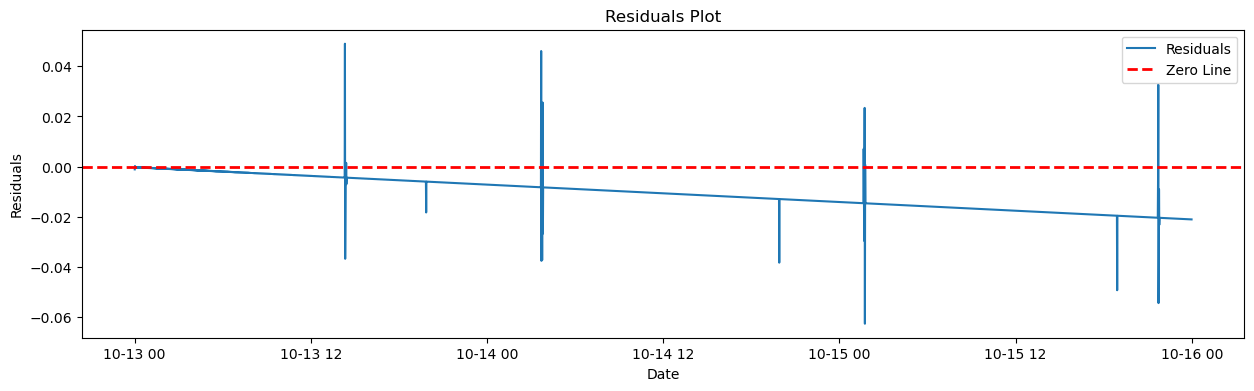

In [80]:
import matplotlib.pyplot as plt

# Assuming forecast is your model's prediction
residuals = test_data['energy_diff_2'] - forecast.predicted_mean

# Plot the residuals
plt.figure(figsize=(15, 4))
plt.plot(test_data.index, residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Line')
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


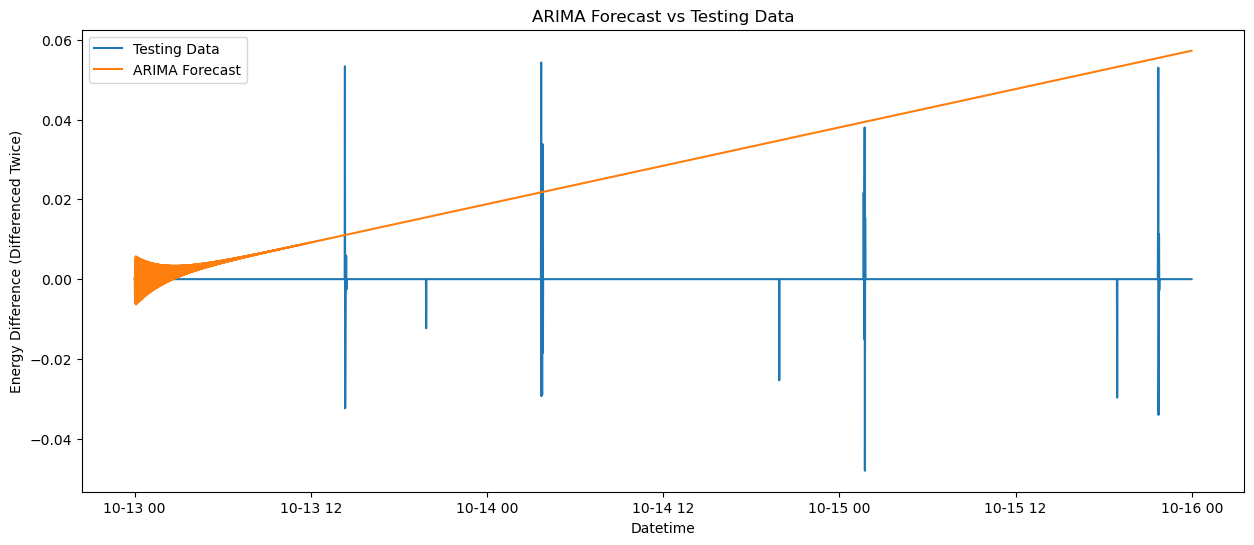

In [77]:
import matplotlib.pyplot as plt

# Plot the testing data and the ARIMA forecast
plt.figure(figsize=(15, 6))
plt.plot(test_data.index, test_data['energy_diff_2'], label='Testing Data')
plt.plot(test_data.index, forecast.predicted_mean, label='ARIMA Forecast')
plt.title('ARIMA Forecast vs Testing Data')
plt.xlabel('Datetime')
plt.ylabel('Energy Difference (Differenced Twice)')
plt.legend()
plt.show()


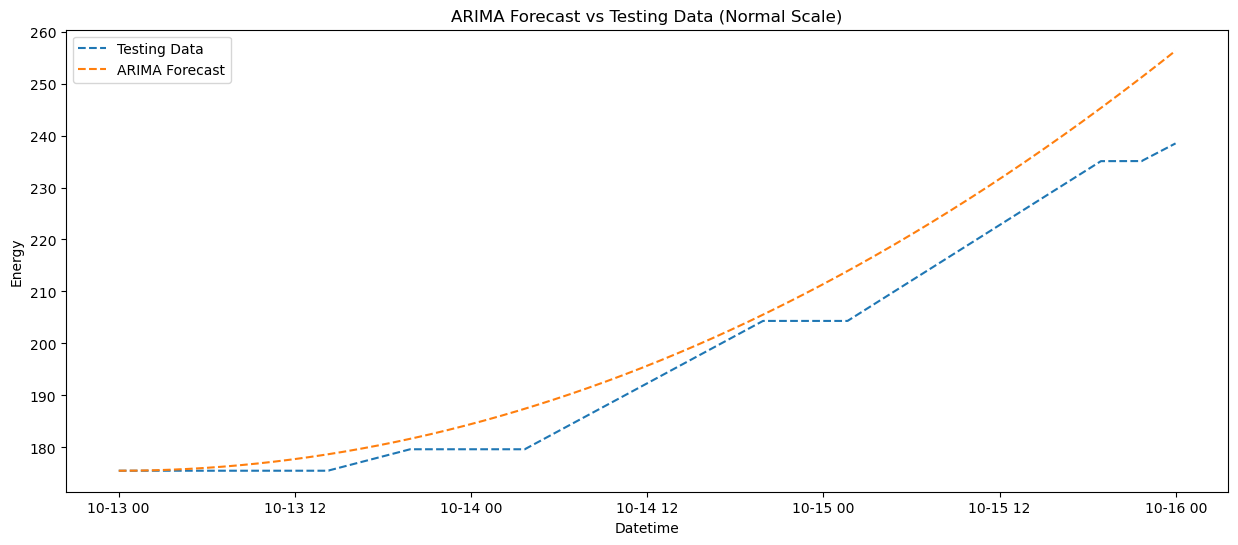

In [107]:
# Reverse the differencing to obtain the forecast on the normal scale
forecast_diff = fit_model.get_forecast(steps=steps).predicted_mean
forecast = train_data['energy'].iloc[-1] + forecast_diff.cumsum()

# Plot the testing data and the forecast on the normal scale
plt.figure(figsize=(15, 6))
plt.plot(test_data.index, test_data['energy'], label='Testing Data', linestyle='--')
plt.plot(test_data.index, forecast, label='ARIMA Forecast', linestyle='--')
plt.legend()
plt.title('ARIMA Forecast vs Testing Data (Normal Scale)')
plt.xlabel('Datetime')
plt.ylabel('Energy')
plt.show()
